<a href="https://colab.research.google.com/github/avrland/dataScienceFromScratch/blob/main/Keras_Lab_Classify_(Multiclass).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this classifier
We try here to classify photos from different places in lab (CRF, CE, BURST, ESD). 

# Loading Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Learn model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import os

#@markdown ---
#@markdown ### Enter a data to learn:
# dimensions of our images.
img_width, img_height = 224, 224
train_data_dir = '/content/drive/My Drive/data_lite/train' #@param {type:"string"}
validation_data_dir = '/content/drive/My Drive/data_lite/val' #@param {type:"string"}
nb_train_samples = 1500
nb_validation_samples = 1500
epochs = 8 #@param {type:"slider", min:1, max:20, step:1}
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_height, img_width)
else:
    input_shape = (img_height, img_width, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


#@markdown ---
#@markdown ### Output model data:
#Create folder with current date and time
from datetime import datetime
currentTime = str(datetime.now().strftime('%Y-%m-%d %H:%M'))
print("Current time: " + currentTime)
outputDir = '/content/drive/My Drive/model/'+ currentTime #@param {type:"string"}
os.makedirs(outputDir)

#Save model and weights
model.save(outputDir + '/model.h5')
model.save_weights(outputDir + '/weights.h5')

#Save history to file
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 
# or save to csv: 
hist_csv_file = outputDir + '/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

#Print and save class labels to file
label_map = (train_generator.class_indices)
print(label_map)
text_file = open(outputDir + '/classes.txt', "w")
text_file.write(str(label_map))
text_file.close()

Found 1613 images belonging to 4 classes.
Found 1618 images belonging to 4 classes.
Epoch 1/8
93/93 [==============================] - 31s 329ms/step - loss: 1.0884 - accuracy: 0.5582 - val_loss: 0.8639 - val_accuracy: 0.6364
Epoch 2/8
93/93 [==============================] - 29s 313ms/step - loss: 0.6890 - accuracy: 0.7428 - val_loss: 1.1858 - val_accuracy: 0.5827
Epoch 3/8
93/93 [==============================] - 30s 318ms/step - loss: 0.5660 - accuracy: 0.7919 - val_loss: 0.9405 - val_accuracy: 0.6848
Epoch 4/8
93/93 [==============================] - 29s 315ms/step - loss: 0.5307 - accuracy: 0.8229 - val_loss: 1.0035 - val_accuracy: 0.6472
Epoch 5/8
93/93 [==============================] - 29s 316ms/step - loss: 0.4362 - accuracy: 0.8525 - val_loss: 1.2192 - val_accuracy: 0.6942
Epoch 6/8
93/93 [==============================] - 29s 315ms/step - loss: 0.3983 - accuracy: 0.8640 - val_loss: 1.0270 - val_accuracy: 0.7191
Epoch 7/8
93/93 [==============================] - 28s 306ms/ste

# **Classify photos**

['BURST', 'CE', 'CRF', 'ESD']
[0. 1. 0. 0.]


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


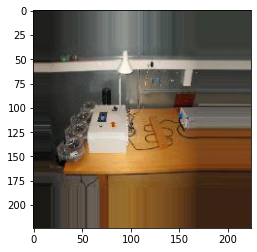

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
#from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
from tensorflow import keras
from keras.models import load_model
import glob
import ast
import matplotlib.pyplot as plt
import random
#Show model namefile
usedDate = '2022-04-03 06:22' #@param {type:"string"}
loadedModelDir = '/content/drive/My Drive/model/' + usedDate + '/'
#Get labels from model
model2 = load_model(loadedModelDir  + 'model.h5', compile=False)
labelFile = open(loadedModelDir  + 'classes.txt')
labels = labelFile.readlines()
labels_dict = ast.literal_eval(labels[0])
labels_list = list(labels_dict.keys())
labelFile.close()

#Enter tested photo here
testingPath = '/content/drive/My Drive/data_lite/val/CE/*' #@param {type:"string"}
files = glob.glob(testingPath)
photoNumber = random.randrange(0,len(files))
#Load the image to predict
img = load_img(files[photoNumber], target_size=(224,224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model2.predict(img_array)
print(labels_list)
print(str(prediction[0]))
#Show image in good resolution
img = load_img(files[photoNumber], target_size=(224,224))
plt.imshow(img, cmap=plt.cm.binary)

# Model test parameters

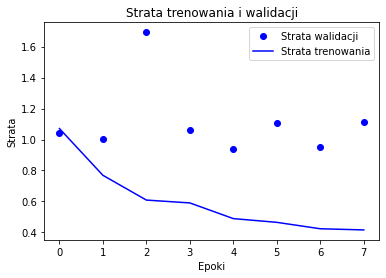

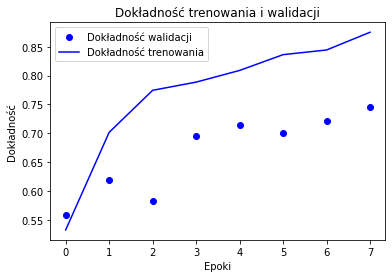

In [ ]:
#History from file
import csv
csvFile = open(loadedModelDir + 'history.csv')
csvReader = csv.reader(csvFile)
csvData = list(csvReader)

epochs = [row[0] for row in csvData][1:]
epochs = list(map(float, epochs))
val_loss = [row[1] for row in csvData][1:]
val_loss = list(map(float, val_loss))
val_acc = [row[2] for row in csvData][1:]
val_acc = list(map(float, val_acc))
loss = [row[3] for row in csvData][1:]
loss = list(map(float, loss))
acc = [row[4] for row in csvData][1:]
acc = list(map(float, acc))

#Tworzenie wykresu strat trenowania i walidacji
import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'bo', label='Strata walidacji')
plt.plot(epochs, val_loss, 'b', label='Strata trenowania')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'bo', label='Dokładność walidacji')
plt.plot(epochs, val_acc, 'b', label='Dokładność trenowania')
plt.title('Dokładność trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

# Visualization (layers of activation)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


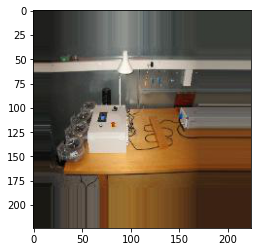

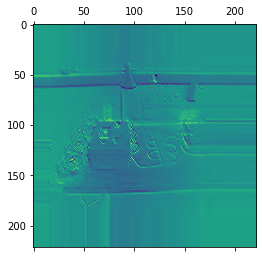

In [57]:
from keras.preprocessing import image
from keras import models
img_array_255 = img_array / 255
plt.imshow(img_array_255[0])

layer_outputs = [layer.output for layer in model2.layers[:8]]
activation_model = models.Model(inputs=model2.input, outputs=layer_outputs)
activations = activation_model.predict(img_array_255)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


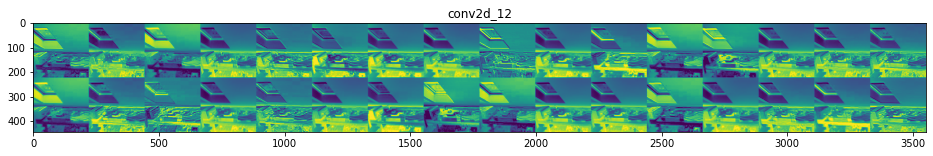

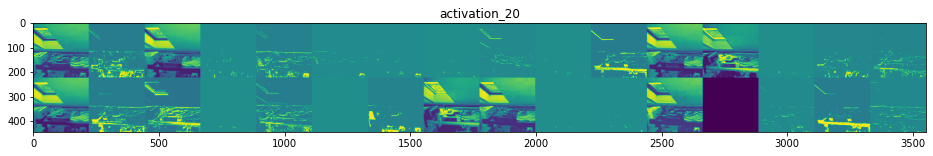

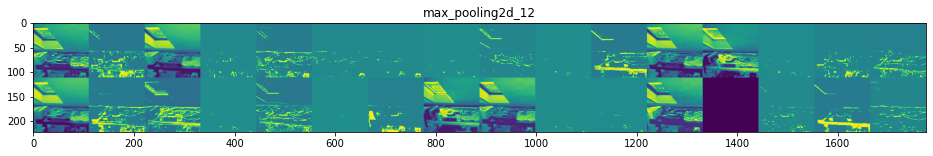

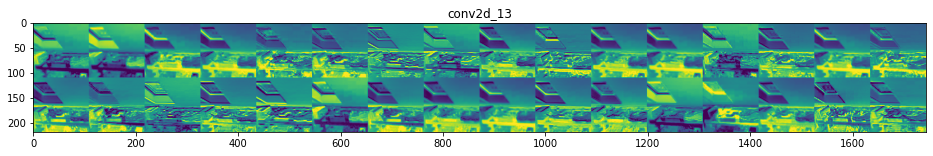

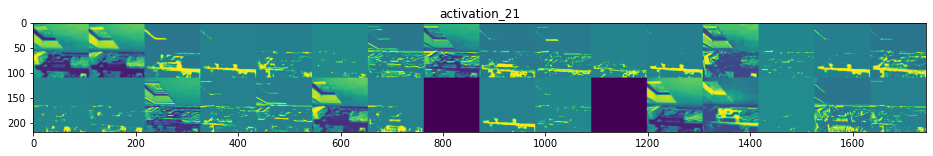

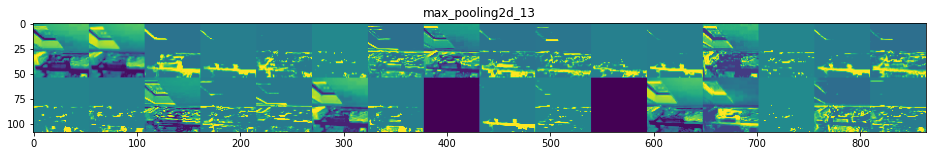

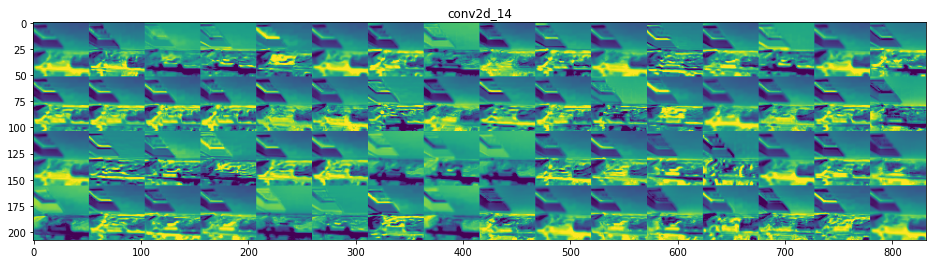

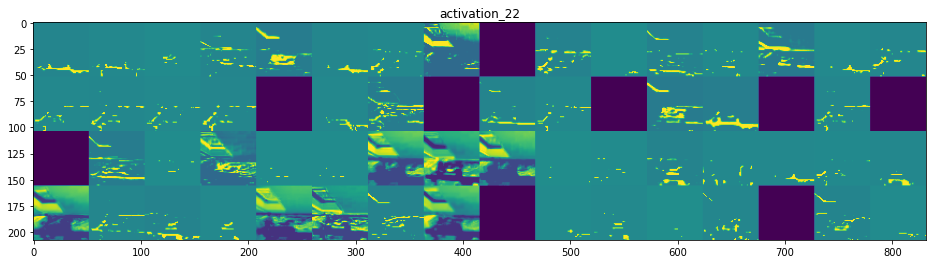

In [ ]:
import keras

# Na wykresie umieścimy również nazwy warstw.
layer_names = []
for layer in model2.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Wyświetla mapy cech.
for layer_name, layer_activation in zip(layer_names, activations):
    # Liczba cech w mapie.
    n_features = layer_activation.shape[-1]

    # Mapa cech ma kształt (1, size, size, n_features).
    size = layer_activation.shape[1]

    # Tworzy kafelki kanałów aktywacji w tej macierzy.
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # Tworzy poziomą siatkę składajacą się z filtrów.
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Przetwarzanie cechy w celu wygenerowania czytelnej wizualizacji.
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Wyświetla siatkę.
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

# Feature heatmap (work in progress)

In [ ]:
img_array_255 = img_array / 255
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# Wartość wektora predykcji odwołująca się do klasy „słoń afrykański”.
african_elephant_output = model2.output[:, 0]
print(model2.output[:, 0])
print(model2.output[:, 1])
print(model2.output[:, 2])
print(model2.output[:, 3])
# Wyjściowa mapa cech warstwy block5_conv3 — ostatniej warstwy konwolucyjnej modelu VGG16.
last_conv_layer = model2.get_layer('conv2d_14')

# Gradient klasy „słoń afrykanski” uwzględniający wyjściową mapę cech warstwy block5_conv3.
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# Wektor o kształcie (512,). Każda wartość tego wektora jest średnią intensywności 
# gradientu przy określonym kanale mapy cech.
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# Pozwala na uzyskanie dostępu do 
# zdefiniowanych przed chwilą wartości pooled_grads i wyjściowej mapy cech block5_conv3.
iterate = K.function([model2.input], [pooled_grads, last_conv_layer.output[0]])

# Wartości dwóch niewiadomych w formie tablic Numpy 
# (wartości te powstały w wyniku przetwarzania obrazu dwóch słoni).
print(img_array.shape)
pooled_grads_value, conv_layer_output_value = iterate([img_array_255])
print(conv_layer_output_value.shape)
# Mnożenie każdego kanału tablicy mapy cech przez wartość określającą 
# „jego wpływ na to, że obraz przedstawia słonia”.
for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# Średnia kanałów wyjściowej mapy cech jest mapą ciepła aktywacji klasy.
heatmap = np.mean(conv_layer_output_value, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

RecursionError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


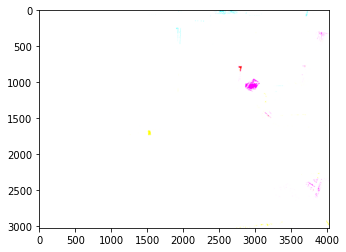

In [ ]:
import cv2

# Wczytujemy oryginalny obraz za pomocą modułu cv2.
img = cv2.imread(files[photoNumber])

# Zmieniamy rozdzielczość mapy ciepła tak, aby miała ona taką samą rozdzielczość jak analizowane zdjęcie.
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

# Konwersja mapy cieplnej na płaszczyznę RGB.
heatmap = np.uint8(255 * heatmap)

# Nakładamy mapę cieplną na oryginalny obraz.
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Określamy wartość współczynnika intensywności mapy cieplnej (0,4).
superimposed_img = heatmap * 0.4 + img

cv2.imwrite('output.jpg', superimposed_img)